Se recomienda correr en Colab

In [1]:
%pip install pygad==2.3.0

In [2]:
import numpy
import imageio
import pygad
import matplotlib.pyplot
import numpy
import functools
import operator
from keras.preprocessing.image import load_img

In [3]:
"""
GARI (Genetic Algorithm for Reproducing Images) is a Python project that uses the PyGAD library for reproducing images using the genetic algorithm.
GARI reproduces a single image using Genetic Algorithm (GA) by evolving pixel values.
For implementing the genetic algorithm, the PyGAD library is used.
Check its documentation here: https://pygad.readthedocs.io
This project works with both color and gray images without any modifications.
This project is implemented using Python 3.5 by Ahmed Fawzy Gad.
"""

def img2chromosome(img_arr):
    """
    Represents the image as a 1D vector.

    img_arr: The image to be converted into a vector.

    Returns the vector.
    """

    return numpy.reshape(a=img_arr, newshape=(functools.reduce(operator.mul, img_arr.shape)))


In [4]:
def chromosome2img(vector, shape):
    """
    Converts a 1D vector into an array.

    vector: The vector to be converted into an array.
    shape: The shape of the target array.

    Returns the array.
    """

    # Check if the vector can be reshaped according to the specified shape.
    if len(vector) != functools.reduce(operator.mul, shape):
        raise ValueError("A vector of length {vector_length} into an array of shape {shape}.".format(vector_length=len(vector), shape=shape))

    return numpy.reshape(a=vector, newshape=shape)

In [5]:
def fitness_fun(solution, solution_idx):
    """
    Calculating the fitness value for a solution in the population.
    The fitness value is calculated using the sum of absolute difference between genes values in the original and reproduced chromosomes.

    solution: Current solution in the population to calculate its fitness.
    solution_idx: Index of the solution within the population.
    """

    fitness = numpy.sum(numpy.abs(target_chromosome-solution))

    # Negating the fitness value to make it increasing rather than decreasing.
    fitness = numpy.sum(target_chromosome) - fitness
    return fitness


In [6]:
def callback(ga_instance):
    print("Generation = {gen}".format(gen=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

    if ga_instance.generations_completed % 500 == 0:
        matplotlib.pyplot.imsave('solution_'+str(ga_instance.generations_completed)+'.png', chromosome2img(ga_instance.best_solution()[0], target_im.shape))


In [9]:
# load and show an image with Pillow
from PIL import Image
import requests
from io import BytesIO

response = requests.get('https://github.com/M-Yerro/IA2025/blob/main/07-IA2025%20fruit.jpg?raw=true')
# Open the image form working directory
image = Image.open(BytesIO(response.content))
print(image.format)
print(image.size)
print(image.mode)
# show the image
image.show()


JPEG
(200, 150)
RGB


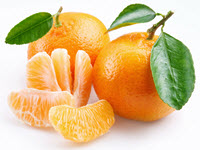

In [10]:
image

In [11]:
target_im = numpy.asarray(image)
target_im = numpy.asarray(target_im/255, dtype=float)

In [12]:
# Target image after enconding. Value encoding is used.
target_chromosome = img2chromosome(target_im)

In [13]:
target_im

array([[[0.97647059, 0.98039216, 0.98823529],
        [0.97647059, 0.98039216, 0.98823529],
        [0.97647059, 0.98039216, 0.98823529],
        ...,
        [0.96470588, 0.98039216, 0.98431373],
        [0.96470588, 0.98039216, 0.98431373],
        [0.96470588, 0.98039216, 0.98431373]],

       [[0.97647059, 0.98039216, 0.98823529],
        [0.97647059, 0.98039216, 0.98823529],
        [0.97647059, 0.98039216, 0.98823529],
        ...,
        [0.96470588, 0.98039216, 0.98431373],
        [0.96470588, 0.98039216, 0.98431373],
        [0.96470588, 0.98039216, 0.98431373]],

       [[0.97647059, 0.98039216, 0.98823529],
        [0.97647059, 0.98039216, 0.98823529],
        [0.97647059, 0.98039216, 0.98823529],
        ...,
        [0.96470588, 0.98039216, 0.98431373],
        [0.96470588, 0.98039216, 0.98431373],
        [0.96470588, 0.98039216, 0.98431373]],

       ...,

       [[0.98823529, 0.98823529, 0.99607843],
        [0.98823529, 0.98823529, 0.99607843],
        [0.98823529, 0

In [14]:
ga_instance = pygad.GA(num_generations=20000,
                       num_parents_mating=10,
                       fitness_func=fitness_fun,
                       sol_per_pop=20,
                       num_genes=target_im.size,
                       init_range_low=0.0,
                       init_range_high=1.0,
                       mutation_percent_genes=0.01,
                       mutation_type="random",
                       mutation_by_replacement=True,
                       random_mutation_min_val=0.0,
                       random_mutation_max_val=1.0,
                       callback_generation=callback)

ga_instance.run()

Se han truncado las últimas 5000 líneas del flujo de salida.
Generation = 17501
Fitness    = 39873.06103031123
Generation = 17502
Fitness    = 39873.06103031123
Generation = 17503
Fitness    = 39873.06103031123
Generation = 17504
Fitness    = 39873.896694287985
Generation = 17505
Fitness    = 39874.316021324106
Generation = 17506
Fitness    = 39875.00994619948
Generation = 17507
Fitness    = 39875.00994619948
Generation = 17508
Fitness    = 39875.00994619948
Generation = 17509
Fitness    = 39875.00994619948
Generation = 17510
Fitness    = 39875.00994619948
Generation = 17511
Fitness    = 39875.00994619948
Generation = 17512
Fitness    = 39876.54177821277
Generation = 17513
Fitness    = 39876.98399616937
Generation = 17514
Fitness    = 39876.98399616937
Generation = 17515
Fitness    = 39877.29224065857
Generation = 17516
Fitness    = 39877.48592677634
Generation = 17517
Fitness    = 39877.973775347855
Generation = 17518
Fitness    = 39878.31966420864
Generation = 17519
Fitness    = 3987

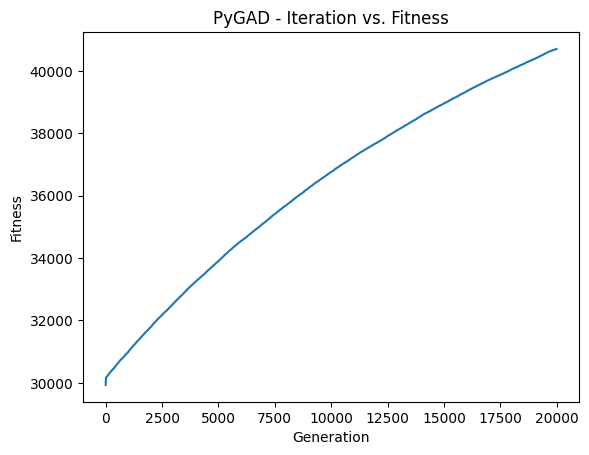

Fitness value of the best solution = 40703.902853073
Index of the best solution : 0
Best fitness value reached after 19999 generations.


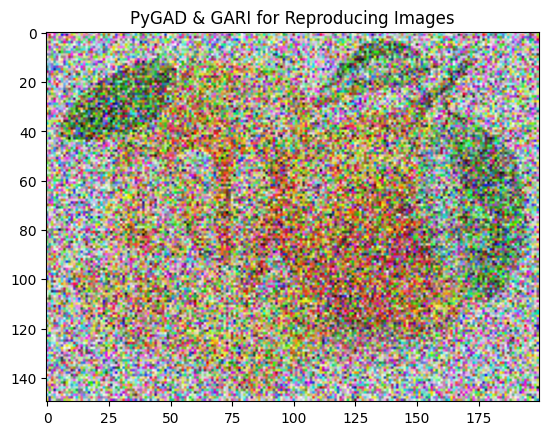

In [15]:
# After the generations complete, some plots are showed that summarize the how the outputs/fitenss values evolve over generations.
ga_instance.plot_result()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

result = chromosome2img(solution, target_im.shape)

matplotlib.pyplot.imshow(result)
matplotlib.pyplot.title("PyGAD & GARI for Reproducing Images")
matplotlib.pyplot.show()